In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
rng = np.random.default_rng(42)

# Fixed effects: Fertilizer treatments
treatments = ['Control', 'Fertilizer A', 'Fertilizer B']
num_plots = 10
num_weeks = 5

data = []
for plot_id in range(num_plots):
    # Random effect: A unique intercept and slope for each plot
    # Simulates inherent differences in soil quality, sun exposure, etc.
    random_intercept = rng.normal(loc=1, scale=0.5)
    random_slope = rng.normal(loc=0.5, scale=0.2)

    # Fixed effect: Assign a treatment
    treatment = treatments[plot_id % len(treatments)]

    for week in range(num_weeks):
        # Base growth rate over time
        base_growth = random_intercept + random_slope * week

        # Fixed effect: Add the effect of the fertilizer
        if treatment == 'Fertilizer A':
            growth_effect = 1.0 * week
        elif treatment == 'Fertilizer B':
            growth_effect = 2.0 * week
        else:
            growth_effect = 0

        # Add random error
        error = rng.normal(loc=0, scale=0.5)
        growth = base_growth + growth_effect + error

        data.append([plot_id, treatment, week, growth])

df = pd.DataFrame(data, columns=['Plot_ID', 'Fertilizer_Treatment', 'Week', 'Growth'])

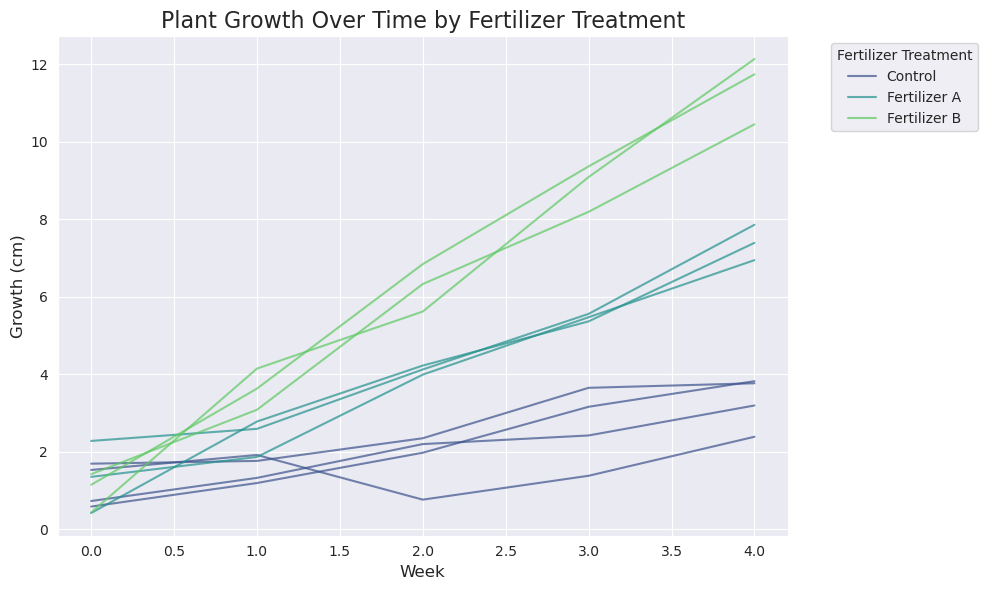

In [7]:
sns.set_style('darkgrid')

# Create the plot
plt.figure(figsize=(10, 6))

# Use a line plot to show each plot's growth over time
# The hue argument color-codes lines by fertilizer treatment
sns.lineplot(data=df, x='Week', y='Growth', hue='Fertilizer_Treatment', units='Plot_ID', estimator=None, palette='viridis', alpha=0.7)

# Add labels and a title
plt.title('Plant Growth Over Time by Fertilizer Treatment', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Growth (cm)', fontsize=12)

# Move the legend outside the plot
plt.legend(title='Fertilizer Treatment', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent the legend from being cut off
plt.tight_layout()

plt.savefig('../../assets/images/regression/linear_mixed_model_demo.png', bbox_inches='tight');